## Wine Quality Prediction
<code>dataset : <link>https://drive.google.com/file/d/1i3Rj9mmOv_0AtXGM3hiE_Sqn4Q9P6X-r/view?usp=sharing</link></code>

In [76]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
df=pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [79]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


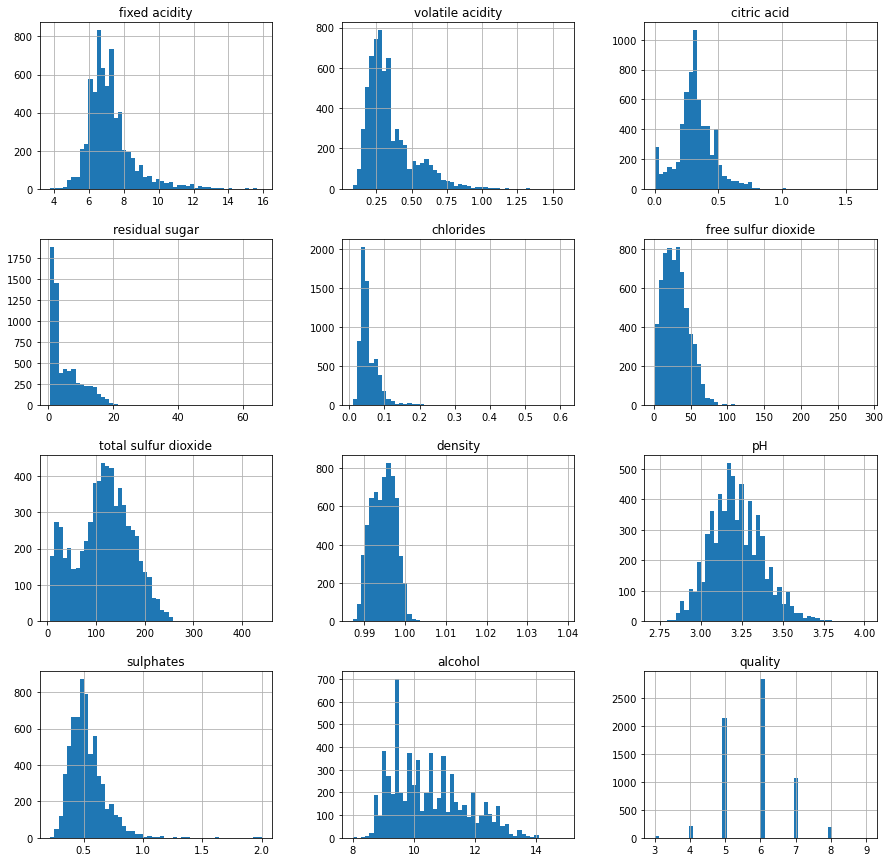

In [80]:
#distribution of columns
df.hist(bins=50,figsize=(15,15))
plt.show()


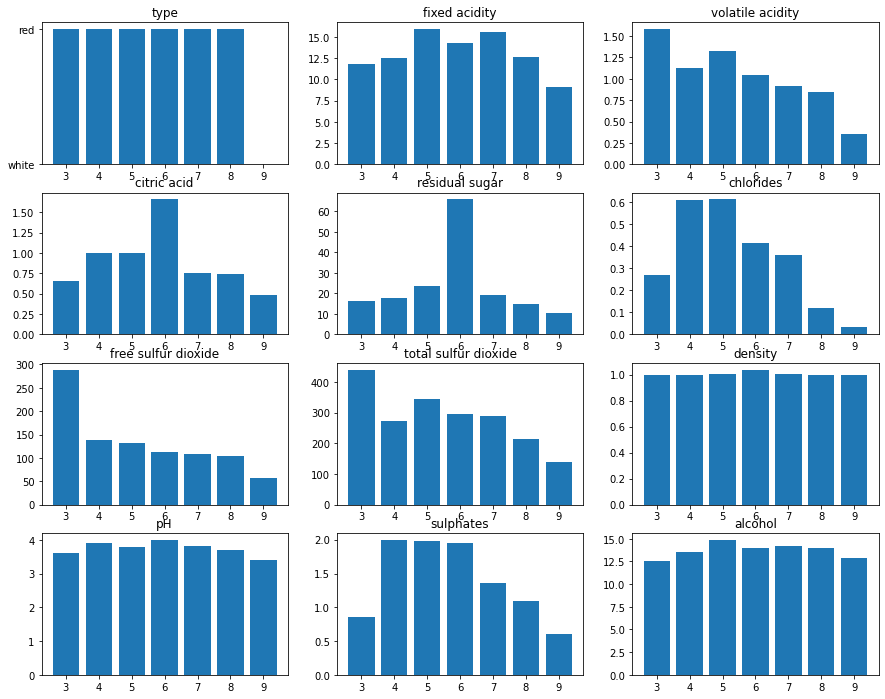

In [81]:
# relation with output variable
# as our output variable is  categorical we will use bar plot for multivariate analysis
plt.figure(figsize=(15,12))
for i in range((df.shape[1])-1):
    plt.subplot(4,3,i+1)
    plt.bar(df.quality,df[df.columns[i]])
    plt.title(df.columns[i])


In [82]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


<AxesSubplot:>

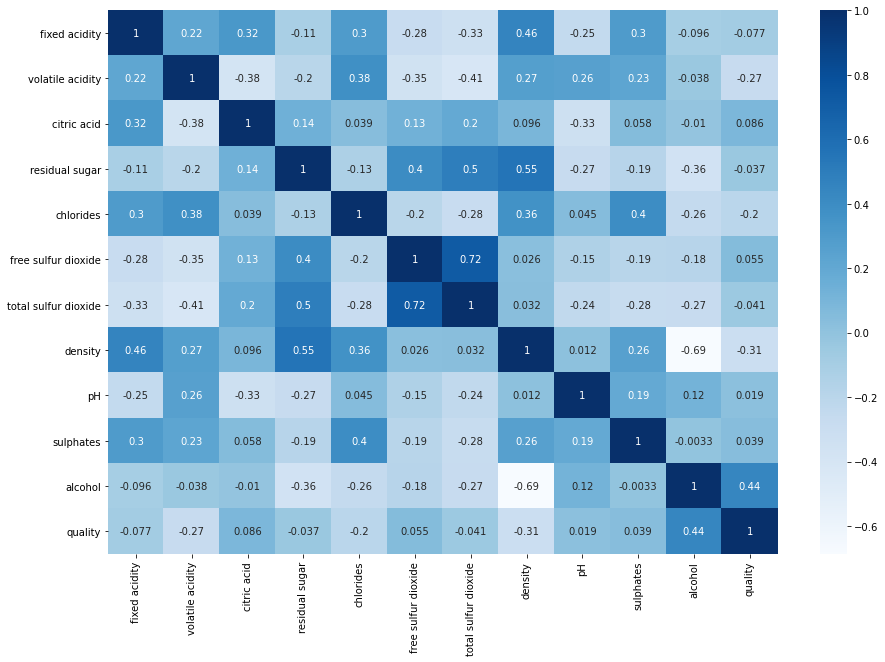

In [83]:
fig=plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [84]:
#correlated columns
l=[]
for i in range(len(df.corr().columns)):
    for j in range(i):
        if abs(df.corr().iloc[i,j])>0.7:
            l.append(df.corr().columns[i])
l

['total sulfur dioxide']

In [85]:
print(df.density.std())
print('although density have very high deviation but it has -0.3 correlation with quality so we cannot drop it')

0.0029986730037190345
although density have very high deviation but it has -0.3 correlation with quality so we cannot drop it


In [86]:
const=[]
for i in df.columns:
    if df[i].dtypes!='object' and df[i].std()<0.1:
        const.append(i)
const

['chlorides', 'density']

In [87]:
#dropping
new_df=df.drop(l,axis=1)

In [88]:
#null imputation
new_df.isnull().mean()

type                   0.000000
fixed acidity          0.001539
volatile acidity       0.001231
citric acid            0.000462
residual sugar         0.000308
chlorides              0.000308
free sulfur dioxide    0.000000
density                0.000000
pH                     0.001385
sulphates              0.000616
alcohol                0.000000
quality                0.000000
dtype: float64

<AxesSubplot:ylabel='Density'>

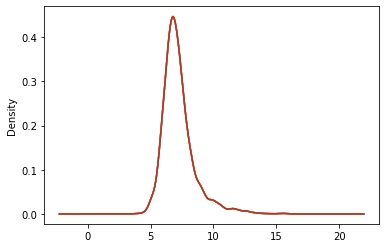

In [89]:
new_df['fixed acidity'].fillna(df['fixed acidity'].dropna(axis=0).mean()).plot.kde()
new_df['fixed acidity'].fillna(df['fixed acidity'].dropna(axis=0).median()).plot.kde()
new_df['fixed acidity'].fillna(df['fixed acidity'].dropna(axis=0).mode()).plot.kde()
new_df['fixed acidity'].plot.kde()

In [90]:
## As above  distribution remain same for mean,median,mode imputation so we can substitute with any of them
#lest use median
# similarly for other features as well,as the null values are nearly 0% of total.
new_df=new_df.fillna(new_df.mean())
new_df.isnull().sum()

type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [91]:
##Transform target variable as it has too many categories
## create lesser catergories

q_encod=[]
for i in new_df.quality:
    if i<=5:
        
        q_encod.append(int('001'))
    elif i>5 and i<=7:
        
        q_encod.append(int('010'))
    else:
        
        q_encod.append(int('100'))

new_df['quality_encoded']=q_encod


In [92]:
new_df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_encoded
0,white,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,10
1,white,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,10
2,white,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,10
3,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,10
4,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,10


In [93]:
dummies_df=pd.get_dummies(new_df,drop_first=True)

In [94]:
dummies_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_encoded,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,10,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,10,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,10,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,10,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,10,1


In [95]:
# seperating feature and target variables
x=dummies_df.drop(['quality','quality_encoded'],axis=1)
y=dummies_df['quality_encoded']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
##Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled)

[[0.23140496 0.11333333 0.21686747 ... 0.10857143 0.17391304 1.        ]
 [0.38842975 0.05333333 0.21084337 ... 0.07428571 0.28985507 1.        ]
 [0.18181818 0.13333333 0.20481928 ... 0.08571429 0.31884058 1.        ]
 ...
 [0.79338843 0.12666667 0.37349398 ... 0.25142857 0.24637681 0.        ]
 [0.4214876  0.21333333 0.30722892 ... 0.38285714 0.7826087  0.        ]
 [0.3553719  0.12666667 0.21084337 ... 0.22857143 0.34782609 1.        ]]


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rnd = RandomForestClassifier()

fit_rnd = rnd.fit(x_train_scaled,y_train)

rnd_score = rnd.score(x_test_scaled,y_test)
print('score of model is : ',rnd_score)
y_predict=rnd.predict(x_test_scaled)
print(classification_report(y_test,y_predict))

score of model is :  0.83
              precision    recall  f1-score   support

           1       0.79      0.78      0.79       468
          10       0.85      0.88      0.86       800
         100       1.00      0.25      0.40        32

    accuracy                           0.83      1300
   macro avg       0.88      0.64      0.68      1300
weighted avg       0.83      0.83      0.83      1300



In [98]:
from sklearn.metrics import confusion_matrix
cm=pd.DataFrame(confusion_matrix(y_test,y_predict),index=['bad','good','best'],columns=['bad','good','best'])
cm

,bad,good,best
bad,367,101,0
good,96,704,0
best,1,23,8


In [107]:
rnd.score(x_train_scaled,y_train),rnd.score(x_test_scaled,y_test)

(1.0, 0.83)

In [108]:
# saving our model
import pickle
file = 'wine_quality'
#save file
save = pickle.dump(rnd,open(file,'wb'))